In [1]:
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
import missingno as msno
import random
import time
from sklearn.model_selection import train_test_split
from IPython.display import display

In [13]:
data = pd.read_csv("kendaraan_train.csv")
data_test = pd.read_csv("kendaraan_test.csv")
data.head(5)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


<AxesSubplot:>

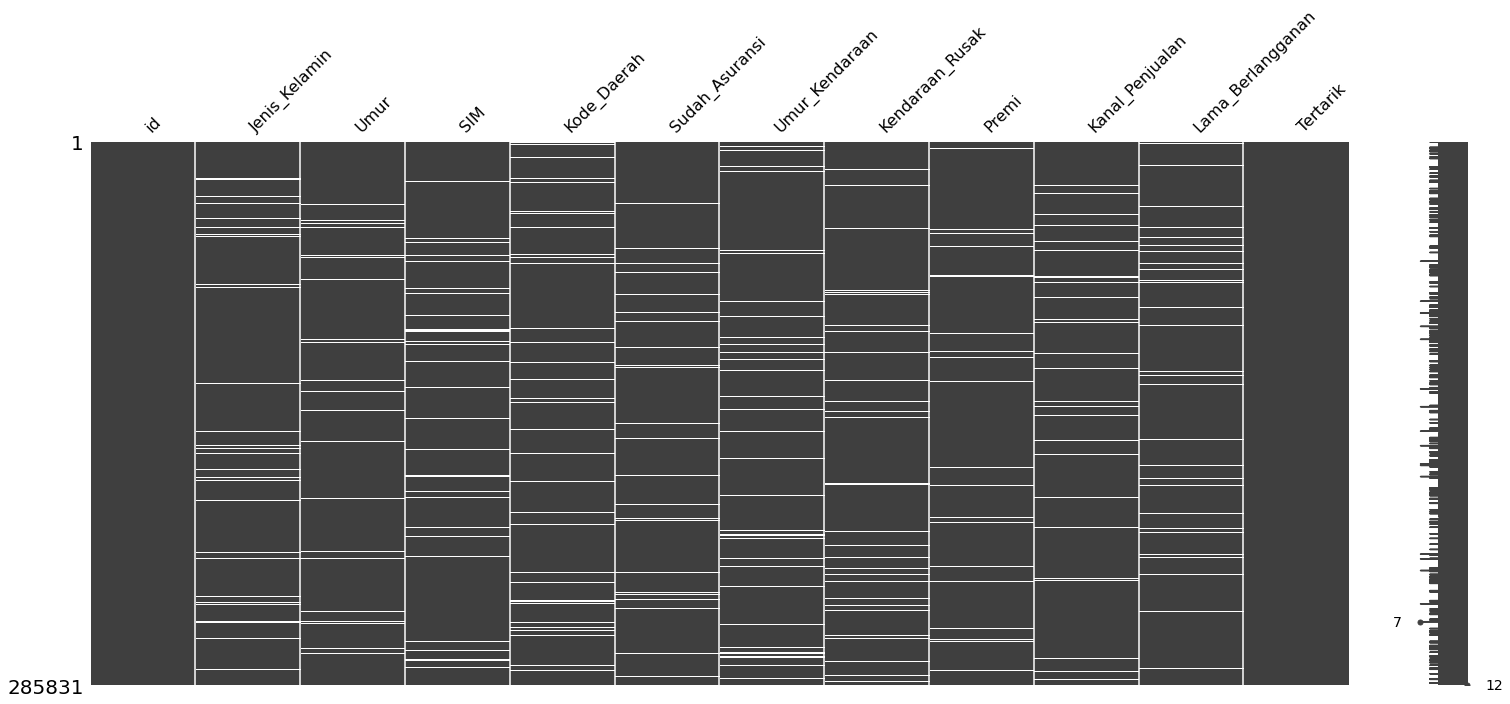

In [14]:
msno.matrix(data)

In [15]:
#Jumlah Missing Value
print(data.isnull().sum())
data.shape

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64


(285831, 12)

In [16]:
#Jumlah Missing Value
print(data_test.isnull().sum())
data_test.shape

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


(47639, 11)

In [17]:
#untuk melihat tipe data tiap kolom
data.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [18]:
#input missing value
data["Jenis_Kelamin"] = data["Jenis_Kelamin"].replace(np.NaN, np.random.choice(a=["Pria", "Wanita"],p=[0.54, 0.46]))
data["Umur"] = data["Umur"].replace(np.NaN, data["Umur"].mean())
data["SIM"] = data["SIM"].replace(np.NaN, np.random.choice(a=[1, 0],p=[0.9956, 0.0044]))
data["Kode_Daerah"] = data["Kode_Daerah"].replace(np.NaN, statistics.mode(data["Kode_Daerah"]))
data["Sudah_Asuransi"] = data["Sudah_Asuransi"].replace(np.NaN, np.random.choice(a=[0, 1],p=[0.5417, 0.4583]))
data["Umur_Kendaraan"] = data["Umur_Kendaraan"].replace(np.NaN, np.random.choice(a=["< 1 Tahun", "1-2 Tahun", "> 2 Tahun"],p=[0.431, 0.527, 0.042]))
data["Kendaraan_Rusak"] = data["Kendaraan_Rusak"].replace(np.NaN, np.random.choice(a=["Pernah", "Tidak"],p=[0.5355, 0.4645]))
data["Premi"] = data["Premi"].replace(np.NaN, data["Premi"].mean())
data["Kanal_Penjualan"] = data["Kanal_Penjualan"].replace(np.NaN, 152)
data["Lama_Berlangganan"] = data["Lama_Berlangganan"].replace(np.NaN, data["Lama_Berlangganan"].mean())

print(data.isnull().sum())
data.shape

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


(285831, 12)

In [19]:
#konversi tipe data
convert_data_types ={
    #'id' : int,
    'Jenis_Kelamin' : object,
    'Umur' : int,
    'SIM' : int,
    'Kode_Daerah' : int,
    'Sudah_Asuransi' : int,
    'Umur_Kendaraan' : object,
    'Kendaraan_Rusak' : object,
    'Premi' : int,
    'Kanal_Penjualan' : int,
    'Lama_Berlangganan' : int
}
data = data.astype(convert_data_types)
data_test = data_test.astype(convert_data_types)
data.dtypes

id                    int64
Jenis_Kelamin        object
Umur                  int32
SIM                   int32
Kode_Daerah           int32
Sudah_Asuransi        int32
Umur_Kendaraan       object
Kendaraan_Rusak      object
Premi                 int32
Kanal_Penjualan       int32
Lama_Berlangganan     int32
Tertarik              int64
dtype: object

In [20]:
data.head(5)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30,1,33,1,< 1 Tahun,Tidak,28029,152,97,0
1,2,Pria,48,1,39,0,> 2 Tahun,Pernah,25800,29,158,0
2,3,Pria,21,1,46,1,< 1 Tahun,Tidak,32733,160,119,0
3,4,Wanita,58,1,48,0,1-2 Tahun,Tidak,2630,124,63,0
4,5,Pria,50,1,35,0,> 2 Tahun,Pernah,34857,88,194,0


In [10]:
#Scale Kendaraan Rusak
scale_Kendaraan_Rusak = {"Tidak":0,"Pernah":1}
data["Kendaraan_Rusak"] = data["Kendaraan_Rusak"].replace(scale_Kendaraan_Rusak)
data_test["Kendaraan_Rusak"] = data_test["Kendaraan_Rusak"].replace(scale_Kendaraan_Rusak)

#Scale Jenis Kelamin
scale_Jenis_Kelamin = {"Wanita":0,"Pria":1}
data["Jenis_Kelamin"] = data["Jenis_Kelamin"].replace(scale_Jenis_Kelamin)
data_test["Jenis_Kelamin"] = data_test["Jenis_Kelamin"].replace(scale_Jenis_Kelamin)

#Scale Umur Kendaraan
umurKD = pd.get_dummies(data["Umur_Kendaraan"], drop_first=True)
data = pd.concat([data,umurKD], axis = 1)
data.drop(["Umur_Kendaraan","id","Kode_Daerah","Kanal_Penjualan"], axis=1,inplace=True)

umurKD = pd.get_dummies(data_test["Umur_Kendaraan"], drop_first=True)
data_test = pd.concat([data_test,umurKD], axis = 1)
data_test.drop(["Umur_Kendaraan","Kode_Daerah","Kanal_Penjualan"], axis=1,inplace=True)

data.head(5)

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik,< 1 Tahun,> 2 Tahun
0,0,30,1,1,0,28029,97,0,1,0
1,1,48,1,0,1,25800,158,0,0,1
2,0,21,1,1,0,32733,119,0,1,0
3,0,58,1,0,0,2630,63,0,0,0
4,1,50,1,0,1,34857,194,0,0,1


In [11]:
data_test.head(5)

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik,< 1 Tahun,> 2 Tahun
0,0,49,1,0,1,46963,145,0,0,0
1,1,22,1,1,0,39624,241,0,1,0
2,1,24,1,1,0,110479,62,0,1,0
3,1,46,1,1,0,36266,34,0,0,0
4,1,35,1,0,1,26963,229,0,0,0


In [ ]:
#data = data.drop(data.query('Tertarik == 0').sample(frac=.2).index)

# LOGISTIC REGRESSION


In [ ]:
#Feature Selection
X1 = data.iloc[:,[0,1,2,3,4,5,6,8,9]].values #DATASET Kendaraan_train
y1 = data.iloc[:,7].values

X2 = data_test.iloc[:,[0,1,2,3,4,5,6,8,9]].values #DATASET Kendaraan_test
y2 = data_test.iloc[:,7].values

#Data Scaling
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X1 = min_max_scaler.fit_transform(X1)
X2 = min_max_scaler.fit_transform(X2)

#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)


#Data Classification Logistic Regression Kendaraan_train
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(class_weight = 'auto')
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
predictions2 = logmodel.predict(X2)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

from sklearn.metrics import accuracy_score
print("Akurasi Menggunakan dataset Kendaraan_train   :",accuracy_score(y_test,predictions),"\n")

#Data Classification Logistic Regression Kendaraan_test
print("Akurasi Menggunakan dataset Kendaraan_test    :",accuracy_score(y2,predictions2))

from sklearn.metrics import confusion_matrix
print("Confusion Matrix :")
print(confusion_matrix(y2,predictions2),"\n")

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     75288
           1       0.33      0.00      0.00     10462

    accuracy                           0.88     85750
   macro avg       0.61      0.50      0.47     85750
weighted avg       0.81      0.88      0.82     85750

Akurasi Menggunakan dataset Kendaraan_train   : 0.8779591836734694 

Akurasi Menggunakan dataset Kendaraan_test    : 0.8768865845210857
Confusion Matrix :
[[41772     6]
 [ 5859     2]] 



#K-Nearest Neighbors

Text(0, 0.5, 'Rate Error')

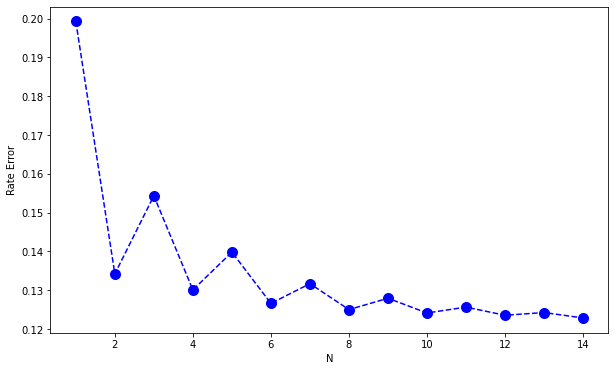

In [ ]:
#K NEAREST NEIGHTBOUR
from sklearn.neighbors import KNeighborsClassifier

#Feature Selection
X1 = data.iloc[:,[1,5,6]].values  #DATASET Kendaraan_train
y1 = data.iloc[:,7].values

X2 = data_test.iloc[:,[1,5,6]].values #DATASET Kendaraan_test
y2 = data_test.iloc[:,7].values

#Data Scaling
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X1 = min_max_scaler.fit_transform(X1)
X2 = min_max_scaler.fit_transform(X2)

#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

#Mencari N terbaik
error_rate = []
for i in range(1,15):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

#Visualisasi N terbaik
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o', markersize=10)
plt.xlabel('N')
plt.ylabel('Rate Error')

In [ ]:
print("Nilai N terbaik : ",error_rate.index(min(error_rate))+1)

Nilai N terbaik :  14


In [ ]:
#Define the model
logmodel = KNeighborsClassifier(n_neighbors=14, p=2, metric='euclidean')

#FIT MODEL
logmodel.fit(X_train,y_train)

#PREDICTION
predictions = logmodel.predict(X_test)
predictions2 = logmodel.predict(X2)

print("Akurasi Menggunakan dataset Kendaraan_train :",accuracy_score(y_test,predictions),"\n")
print("Akurasi Menggunakan dataset Kendaraan_test  :",accuracy_score(y2,predictions2))
print("Confusion Matrix :")
print(confusion_matrix(y2,predictions2),"\n")

Akurasi Menggunakan dataset Kendaraan_train : 0.8771545189504373 

Akurasi Menggunakan dataset Kendaraan_test  : 0.87638279560864
Confusion Matrix :
[[41724    54]
 [ 5835    26]] 



**TPOT**

In [21]:
#Scale Kendaraan Rusak
scale_Kendaraan_Rusak = {"Tidak":0,"Pernah":1}
data["Kendaraan_Rusak"] = data["Kendaraan_Rusak"].replace(scale_Kendaraan_Rusak)
data_test["Kendaraan_Rusak"] = data_test["Kendaraan_Rusak"].replace(scale_Kendaraan_Rusak)

#Scale Jenis Kelamin
scale_Jenis_Kelamin = {"Wanita":0,"Pria":1}
data["Jenis_Kelamin"] = data["Jenis_Kelamin"].replace(scale_Jenis_Kelamin)
data_test["Jenis_Kelamin"] = data_test["Jenis_Kelamin"].replace(scale_Jenis_Kelamin)

#Scale Umur Kendaraan
scale_Umur_Kendaraan = {"< 1 Tahun":0, "1-2 Tahun":0.5, "> 2 Tahun":1}
data["Umur_Kendaraan"] = data["Umur_Kendaraan"].replace(scale_Umur_Kendaraan)
data_test["Umur_Kendaraan"] = data_test["Umur_Kendaraan"].replace(scale_Umur_Kendaraan)

data.head(5)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0,30,1,33,1,0.0,0,28029,152,97,0
1,2,1,48,1,39,0,1.0,1,25800,29,158,0
2,3,1,21,1,46,1,0.0,0,32733,160,119,0
3,4,0,58,1,48,0,0.5,0,2630,124,63,0
4,5,1,50,1,35,0,1.0,1,34857,88,194,0


In [22]:
data.dtypes

id                     int64
Jenis_Kelamin          int64
Umur                   int32
SIM                    int32
Kode_Daerah            int32
Sudah_Asuransi         int32
Umur_Kendaraan       float64
Kendaraan_Rusak        int64
Premi                  int32
Kanal_Penjualan        int32
Lama_Berlangganan      int32
Tertarik               int64
dtype: object

In [ ]:
!pip install tpot

     |████████████████████████████████| 92kB 4.2MB/s 
     |████████████████████████████████| 163kB 33.6MB/s 
     |████████████████████████████████| 166.7MB 69kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=a7fbd28fca36a8359b6815d76eeb48bdd47c9e236b47ac7244b435fb830e557d
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [23]:
data_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0,49,1,8,0,0.5,1,46963,26,145,0
1,1,22,1,47,1,0.0,0,39624,152,241,0
2,1,24,1,28,1,0.0,0,110479,152,62,0
3,1,46,1,8,1,0.5,0,36266,124,34,0
4,1,35,1,23,0,0.5,1,26963,152,229,0


In [24]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

#Feature and Target
Feature = data.iloc[:,[1,2,3,4,5,6,7,8,9,10]].values
Target = data.iloc[:,11].values
Feature_test =  data_test.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values
Target_test = data_test.iloc[:,10].values

#Data Scaling
min_max_scaler = preprocessing.MinMaxScaler()
Feature = min_max_scaler.fit_transform(Feature)
Feature_test = min_max_scaler.fit_transform(Feature_test)

#tpot
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, cv=5, n_jobs=-2)

C:\Users\shidq\AppData\Roaming\Python\Python39\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [25]:
#Data Splitting
training_features, testing_features, training_target, testing_target = train_test_split(Feature, Target, train_size=0.75, test_size=0.25)
print(training_features.size, training_target.size)

tic = time.perf_counter()
#Data Training Using TPOT
tpot.fit(training_features, training_target)

#Scoring
tpot.score(testing_features, testing_target)
toc = time.perf_counter()
print(f" Modelling and Scoring time in {toc - tic:0.4f} seconds")

2143730 214373

Generation 1 - Current best internal CV score: 0.8769434583485598

Generation 2 - Current best internal CV score: 0.8769434583485598

Generation 3 - Current best internal CV score: 0.8769434583485598

Generation 4 - Current best internal CV score: 0.8769434583485598

Generation 5 - Current best internal CV score: 0.8769434583485598

Best pipeline: ExtraTreesClassifier(SelectFwe(input_matrix, alpha=0.033), bootstrap=False, criterion=gini, max_features=0.6500000000000001, min_samples_leaf=19, min_samples_split=17, n_estimators=100)
 Modelling and Scoring time in 3874.6634 seconds


In [26]:
tpot.score(testing_features, testing_target)

0.8792437515743514

In [27]:
tpot.score(Feature_test, Target_test)

0.8768865845210857